# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 



# Описание данных:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

# Задачи:
1. Изучаем следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
2. Изучаем время продажи квартиры. Строим гистограмму. Считаем среднее и медиану. Описываем, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
3. Убираем редкие и выбивающиеся значения. Описываем, какие особенности обнаружили.
4. Какие факторы больше всего влияют на стоимость квартиры? Изучаем, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучаем зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучаем зависимость от даты размещения: дня недели, месяца и года.
5. Выбираем 10 населённых пунктов с наибольшим числом объявлений. Считаем среднюю цену квадратного метра в этих населённых пунктах. Выделяем населённые пункты с самой высокой и низкой стоимостью жилья.
6. Изучаем предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделяем квартиры в Санкт-Петербурге ('locality_name'). Задача — выяснить, какая область входит в центр. Создаем столбец с расстоянием до центра в километрах: округляем до целых значений. После этого считаем среднюю цену для каждого километра. Строим график: он должен показывать, как цена зависит от удалённости от центра. Определяем границу, где график сильно меняется — это и будет центральная зона.
7. Выделяем сегмент квартир в центре. Анализируем эту территорию и изучаем следующие параметры: площадь, цена, число комнат, высота потолков. Также выделяем факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Делаем выводы. Отличаются ли они от общих выводов по всему городу?

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
display(data)
data.info()
data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

В первую очередь бросается огромное количество значений Nan, будем работать над этим

### Шаг 2. Предобработка данных

In [2]:
#выгрузим названия столбцов 
data.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

In [3]:
#перееименуем столбцы для удобства
data.columns.tolist()
cols = ['total_images',
        'last_price',
        'total_area',
        'first_day_exposition',
        'amount_of_rooms',
        'ceiling_height',
        'floors_total',
        'living_area',
        'floor',
        'is_apartment',
        'is_studio',
        'is_open_plan',
        'kitchen_area',
        'amount_of_balconies',
        'town_name',
        'airports_nearest',
        'city_center_nearest',
        'parks_amount_with_3km',
        'parks_nearest',
        'ponds_amount_with_3km',
        'ponds_nearest',
        'days_exposition']
data.set_axis(cols, axis='columns', inplace=True)

In [4]:
# Убедимся, что столбцы переименованы
data.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'amount_of_rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'is_studio',
 'is_open_plan',
 'kitchen_area',
 'amount_of_balconies',
 'town_name',
 'airports_nearest',
 'city_center_nearest',
 'parks_amount_with_3km',
 'parks_nearest',
 'ponds_amount_with_3km',
 'ponds_nearest',
 'days_exposition']

In [5]:
#поменяем местами некоторые столбцы для удобства
data = data[['total_images',
 'last_price',
 'first_day_exposition',
 'amount_of_rooms',
 'ceiling_height',
 'total_area',
 'living_area',
 'kitchen_area',
 'floors_total',
 'floor',
 'is_apartment',
 'is_studio',
 'is_open_plan',
 'amount_of_balconies',
 'town_name',
 'airports_nearest',
 'city_center_nearest',
 'parks_amount_with_3km',
 'parks_nearest',
 'ponds_amount_with_3km',
 'ponds_nearest',
 'days_exposition']]

In [6]:
data.head()

,total_images,last_price,first_day_exposition,amount_of_rooms,ceiling_height,total_area,living_area,kitchen_area,floors_total,floor,...,is_open_plan,amount_of_balconies,town_name,airports_nearest,city_center_nearest,parks_amount_with_3km,parks_nearest,ponds_amount_with_3km,ponds_nearest,days_exposition
0,20,13000000.0,2019-03-07T00:00:00,3,2.70,108.0,51.0,25.0,16.0,8,...,False,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,2018-12-04T00:00:00,1,NaN,40.4,18.6,11.0,11.0,1,...,False,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,2015-08-20T00:00:00,2,NaN,56.0,34.3,8.3,5.0,4,...,False,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,2015-07-24T00:00:00,3,NaN,159.0,NaN,NaN,14.0,9,...,False,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,2018-06-19T00:00:00,2,3.03,100.0,32.0,41.0,14.0,13,...,False,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [7]:
#посмотрим сколько пропущенных значений
data.isnull().sum()

total_images                 0
last_price                   0
first_day_exposition         0
amount_of_rooms              0
ceiling_height            9195
total_area                   0
living_area               1903
kitchen_area              2278
floors_total                86
floor                        0
is_apartment             20924
is_studio                    0
is_open_plan                 0
amount_of_balconies      11519
town_name                   49
airports_nearest          5542
city_center_nearest       5519
parks_amount_with_3km     5518
parks_nearest            15620
ponds_amount_with_3km     5518
ponds_nearest            14589
days_exposition           3181
dtype: int64

In [8]:
# Посмотрим теперь в процентах долю пропущенных значений
data.isnull().sum().sort_values()/data.shape[0]*100

total_images              0.000000
last_price                0.000000
first_day_exposition      0.000000
amount_of_rooms           0.000000
total_area                0.000000
floor                     0.000000
is_open_plan              0.000000
is_studio                 0.000000
town_name                 0.206760
floors_total              0.362885
living_area               8.029875
kitchen_area              9.612220
days_exposition          13.422507
parks_amount_with_3km    23.283683
ponds_amount_with_3km    23.283683
city_center_nearest      23.287902
airports_nearest         23.384953
ceiling_height           38.799105
amount_of_balconies      48.605426
ponds_nearest            61.559559
parks_nearest            65.909954
is_apartment             88.290645
dtype: float64

Много пропущенных значений по столбцу is_apartment. Возможно это связано с тем, что непонятно подходит ли данное жилье под апартаменты или нет, либо не в курсе, какое жилье подходит под апартаменты. Насчет удаленности парков и озер пока непонятно на что можно заменить пропущенные значения и стоит ли это делать

In [9]:
data['town_name'].unique()
data['town_name'] = data['town_name'].str.replace('ё', 'е', regex=True)
data['town_name'].isna().sum()
# Удалим строки без города, они будут мешать в анализе и даже пользователям такие объявления не нужны
data = data.dropna(subset=['town_name'])
data.isna().sum()

total_images                 0
last_price                   0
first_day_exposition         0
amount_of_rooms              0
ceiling_height            9160
total_area                   0
living_area               1898
kitchen_area              2269
floors_total                85
floor                        0
is_apartment             20890
is_studio                    0
is_open_plan                 0
amount_of_balconies      11513
town_name                    0
airports_nearest          5534
city_center_nearest       5511
parks_amount_with_3km     5510
parks_nearest            15586
ponds_amount_with_3km     5510
ponds_nearest            14565
days_exposition           3180
dtype: int64

In [10]:
data['is_apartment'].unique()
# Nan заменим на False, так как объекты жилового фонда
data['is_apartment'] = data['is_apartment'].fillna(0)

In [11]:
#балконы
data['amount_of_balconies'].fillna(0, inplace=True)
data['amount_of_balconies'].isna().value_counts()

False    23650
Name: amount_of_balconies, dtype: int64

In [12]:
#заменим пропуски в площади кухни. Найдем столбец с наибольшим коэффициентом корреляции, далее сгруппируем и нацдем среднее значение
#data.corr()
print(data['kitchen_area'].corr(data['total_area']))
share_kitchen_total = data['kitchen_area']/data['total_area']
data['kitchen_area'] = data['kitchen_area'].fillna((data['total_area']*share_kitchen_total.mean()))

0.6088787817469409


In [13]:
#аналогично заменим пропуски в площади жилого пространства
print(data['living_area'].corr(data['total_area']))
share_living_total = data['living_area']/data['total_area']
data['living_area'] = data['living_area'].fillna((data['total_area']*share_living_total.mean()))

0.9395341841776421


In [14]:
#пропуски в высоте потолков
#заменим значения высоты потолков на общую медиану для отсутствующих значений этажности дома
data['ceiling_height'] = data.groupby('floor')['ceiling_height'].apply(lambda x: x.fillna(x.mean()))

In [15]:
#проверим еще раз пропущенные значения
data.isna().sum()

total_images                 0
last_price                   0
first_day_exposition         0
amount_of_rooms              0
ceiling_height               4
total_area                   0
living_area                  0
kitchen_area                 0
floors_total                85
floor                        0
is_apartment                 0
is_studio                    0
is_open_plan                 0
amount_of_balconies          0
town_name                    0
airports_nearest          5534
city_center_nearest       5511
parks_amount_with_3km     5510
parks_nearest            15586
ponds_amount_with_3km     5510
ponds_nearest            14565
days_exposition           3180
dtype: int64

Стало выглядеть по-лучше. Пропущенные значения по парками прудам обрабатывать нет необходимости, т.к. для дальнейшего анализа эти данные не понадобятся

In [16]:
# Заменим тип данных
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")

### Шаг 3. Посчитайте и добавьте в таблицу

In [17]:
# Добавим столбцы c днем, месяцем и годом
data['day_of_week_exposition'] = data['first_day_exposition'].dt.day_name()
data['month_exposition'] = data['first_day_exposition'].dt.month_name()
data['year_exposition'] = data['first_day_exposition'].dt.year

In [18]:
# Добавим цену квадратного метра
data['price_per_meter'] = data['last_price'] / data['total_area']
data['price_per_meter'] = data['price_per_meter'].round(decimals=2)

In [19]:
# Добавим этажи
data.loc[data['floor'] == 1, 'floor_category'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_category'] = 'последний'
data.loc[data['floor_category'].isna(), 'floor_category'] = 'другой'

In [20]:
#Добавим соотношение жилой и общей площади, а также площади кухни к общей
data['total_living_area_ratio'] = data['living_area'] / data['total_area']
data['total_kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']

In [21]:
data.head()

,total_images,last_price,first_day_exposition,amount_of_rooms,ceiling_height,total_area,living_area,kitchen_area,floors_total,floor,...,ponds_amount_with_3km,ponds_nearest,days_exposition,day_of_week_exposition,month_exposition,year_exposition,price_per_meter,floor_category,total_living_area_ratio,total_kitchen_area_ratio
0,20,13000000.0,2019-03-07,3,2.700000,108.0,51.00000,25.000000,16.0,8,...,2.0,755.0,NaN,Thursday,March,2019,120370.37,другой,0.472222,0.231481
1,7,3350000.0,2018-12-04,1,2.713568,40.4,18.60000,11.000000,11.0,1,...,0.0,NaN,81.0,Tuesday,December,2018,82920.79,первый,0.460396,0.272277
2,10,5196000.0,2015-08-20,2,2.789744,56.0,34.30000,8.300000,5.0,4,...,2.0,574.0,558.0,Thursday,August,2015,92785.71,другой,0.612500,0.148214
3,0,64900000.0,2015-07-24,3,2.638976,159.0,89.79525,29.792073,14.0,9,...,3.0,234.0,424.0,Friday,July,2015,408176.10,другой,0.564750,0.187372
4,2,10000000.0,2018-06-19,2,3.030000,100.0,32.00000,41.000000,14.0,13,...,1.0,48.0,121.0,Tuesday,June,2018,100000.00,другой,0.320000,0.410000


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

In [22]:
# функция, получающая на вход название признака, и возвращающая границы "усов"
def det_whiskers(column):
    stat = data[column].describe()
    # межквартирльный размах
    iqr = stat[6] - stat[4]
    # левый и правый "ус"    
    left_whisker = round(stat[4] - 1.5 * iqr, 2)
    right_whisker = round(stat[6] + 1.5 * iqr, 2)
    # левый "ус" не должен быть меньше минимального значения
    if left_whisker < stat[3]: left_whisker = stat[3] 
    # правый "ус" не должен быть больше максимального значения
    if right_whisker > stat[7]: right_whisker = stat[7]
    return [left_whisker, right_whisker]

In [23]:
data['too_large_area'] = data['total_area'] > det_whiskers('total_area')[1]

In [24]:
data['too_expensive'] = data['last_price'] > det_whiskers('last_price')[1]

In [25]:
data['too_many_rooms'] = data['amount_of_rooms'] > det_whiskers('amount_of_rooms')[1]

In [26]:
data['unusual_ceiling'] = (data['ceiling_height'] > det_whiskers('ceiling_height')[1]) | (data['ceiling_height'] < det_whiskers('ceiling_height')[0])

In [27]:
data['too_slow'] = data['days_exposition'] > det_whiskers('days_exposition')[1]
data['too_fast'] = data['days_exposition'] < 30

In [28]:
good_data = data[(data['too_large_area'] == False) & 
     (data['too_expensive'] == False) &
     (data['too_many_rooms'] == False) &
     (data['unusual_ceiling'] == False) &
     (data['too_slow'] == False) &
     (data['too_fast'] == False)].reset_index(drop=True)

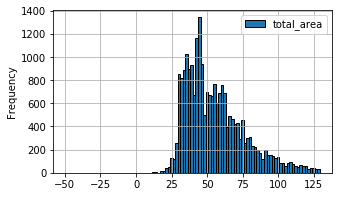

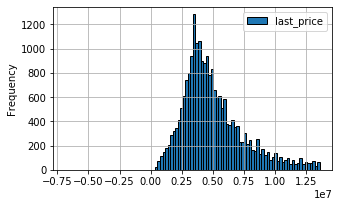

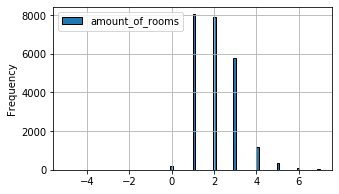

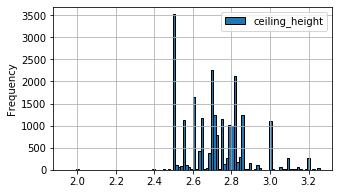

In [29]:
#изучим следующие параметры: площадь, цена, число комнат, высота потолков
#и построем гистограммы для каждого параметра
columns = ['total_area', 'last_price', 'amount_of_rooms', 'ceiling_height']
for i in range(len(columns)):
    Q1 =  data[columns[i]].quantile(0.25)
    Q3 = data[columns[i]].quantile(0.75)
    IQR = Q3 - Q1
    ranges = (Q1-3*IQR, Q1+3*IQR)
    data.plot(y = columns[i], kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = ranges,ec='black')
    data[columns[i]].describe()

Большая часть квартир имеет метраж от 50 до 80 кв.м. 
Цена на квартиры лежит в промежутке от 3 до 7,5 млн. Большаячасть квартир продается за цену в промежутке между 3 и 4,5 млн.
Наибольшее количество комнат от 1 до 3.
Квартиры, в большинстве своем, имеют потолки в среднем от 2,5-2,75м

In [30]:
#Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану.
data['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Text(0.5, 1.0, 'days_exposition')

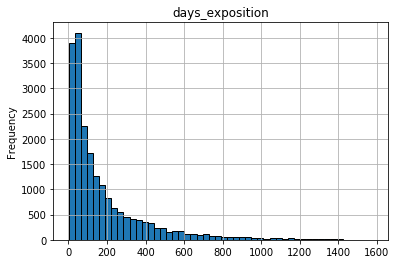

In [31]:
data['days_exposition'].plot(kind='hist',grid=True,bins=50,ec='black')
plt.title('days_exposition')

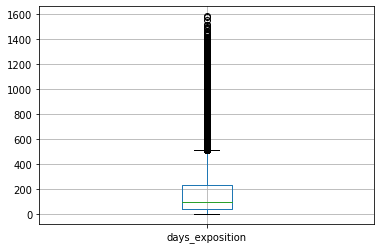

In [32]:
data.boxplot(column='days_exposition')

Боксплот показал выбросы после 500 дн. Отбросим эти значения и посмотрим в промежутке от 0 до 500

Text(0.5, 1.0, 'days_exposition<500')

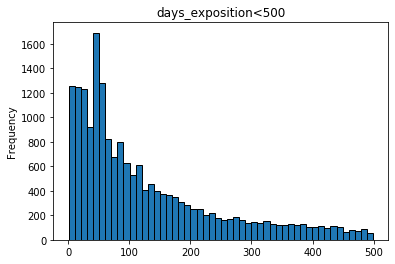

In [33]:
data.query('days_exposition<500')['days_exposition'].plot(kind='hist',bins=50, ec='black')
plt.title('days_exposition<500')

Наибольшее количество дней от 40 до 70. Рассмотрим еще ближе 

Text(0.5, 1.0, '40<days_exposition<70')

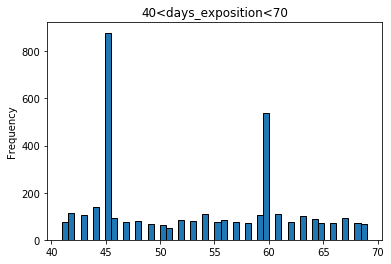

In [34]:
data.query('40<days_exposition<70')['days_exposition'].plot(kind='hist', bins=50, ec='black')
plt.title('40<days_exposition<70')

Выглядит странно. Вполне возможно, что сделки закрываются следующим образом: раз в 15 дней продавцу приходит сообщение с вопросом продал ли он квартиру. Он заходит и делает соответствующую пометку, или каким-то другим способом связываются с продавцом чтобы узнать закрыть объявление или нет. Таким образом, учитывая то, что многие самостоятельно не закрывают объявления, что большая часть квартир продается в пределах 60 дней с момента публикации объявления и что проверка производится раз в 15 дней

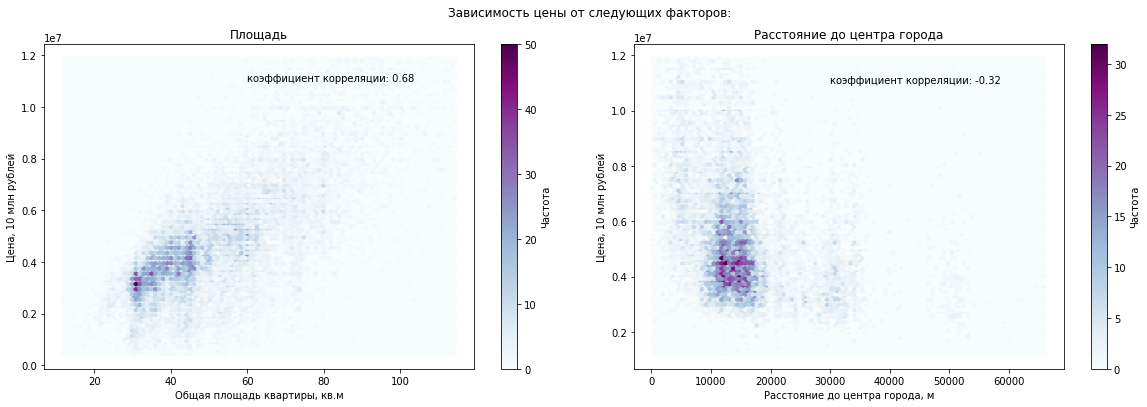

In [35]:
#Далее строим графики зависимости цены от площади и от расстояния до центра города
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(17, 6))
fig.suptitle('Зависимость цены от следующих факторов:')

# построим график зависимости цены от площади
ax1.set_title('Площадь')
ax1.set_ylabel('Цена, 10 млн рублей')
ax1.set_xlabel('Общая площадь квартиры, кв.м')
ax1.text(60, 11000000, 
         'коэффициент корреляции: ' + str(round(good_data['last_price'].corr(good_data['total_area']), 2)))
hb1 = ax1.hexbin(good_data['total_area'], good_data['last_price'], cmap='BuPu')
cb1 = fig.colorbar(hb1, ax=ax1)
cb1.set_label('Частота')

# построим график зависимости цены от расстояния до центра города
ax2.set_title('Расстояние до центра города')
ax2.set_ylabel('Цена, 10 млн рублей')
ax2.set_xlabel('Расстояние до центра города, м')
ax2.text(30000, 11000000, 
         'коэффициент корреляции: ' + str(round(good_data['last_price'].corr(good_data['city_center_nearest']), 2)))
hb2 = ax2.hexbin(good_data['city_center_nearest'], good_data['last_price'], cmap='BuPu')
cb2 = fig.colorbar(hb2, ax=ax2)
cb2.set_label('Частота')

plt.tight_layout(pad=3)
plt.show()

При анализе графика зависимости цены от площади квартиры наблюдается прямая зависимость (т.к. коэффициент корреляции положительный), т.е. чем меньше площадь, тем квартира будет стоить дешевле.
Обратная ситуация при анализе зависимости цены от расстояния до центра города. Коэффициент корреляции отрицательный, значит чем дальше квартира находится от центра, тем дешевле она будет стоить

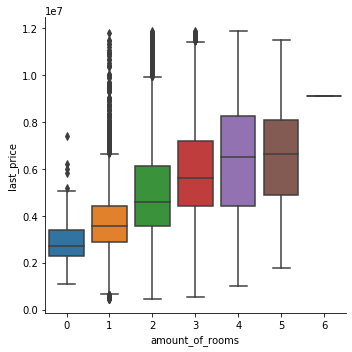

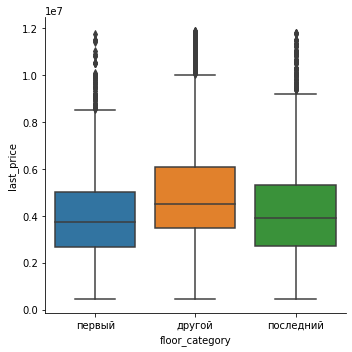

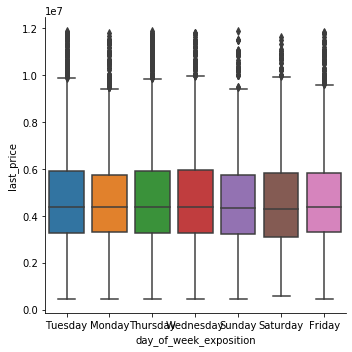

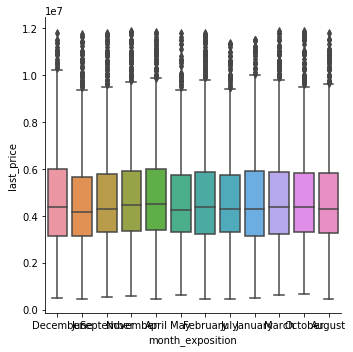

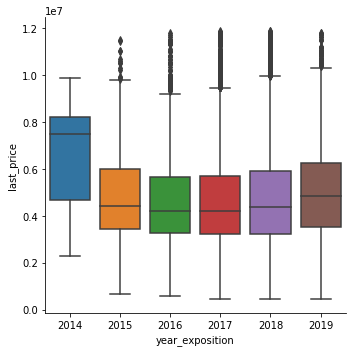

In [36]:
for column in ['amount_of_rooms', 'floor_category', 'day_of_week_exposition', 'month_exposition', 'year_exposition']:
    sns.catplot(x=column, y="last_price", kind="box", data=good_data)

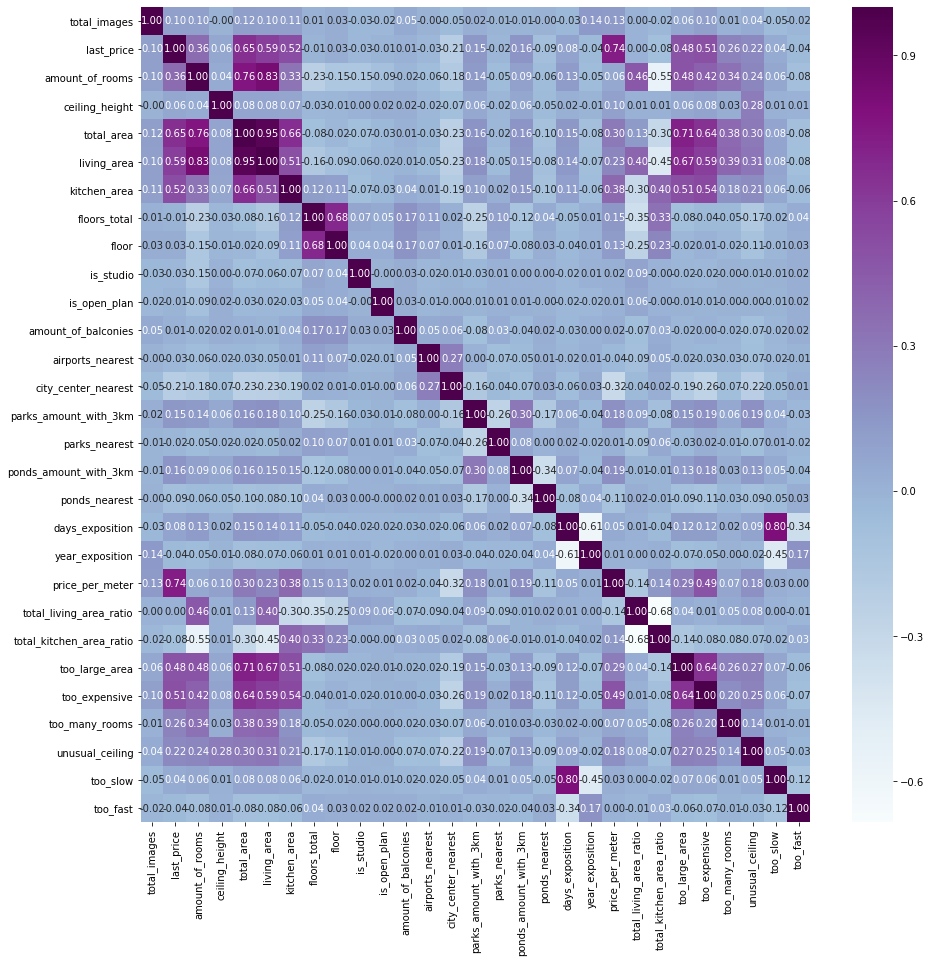

In [37]:
#Воспользуемся функцией corr() и посмотрим, как влияют определенные параметры квартиры на её финальную цену.
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, cmap="BuPu", fmt='.2f')

In [38]:
median_price_per_sqm = good_data.pivot_table(index='town_name', values='price_per_meter', aggfunc=['count', 'median'])
median_price_per_sqm.columns = ['count', 'median']
median_price_per_sqm.sort_values('count', ascending=False).head(10)

,count,median
town_name,,
Санкт-Петербург,9943,102134.150
поселок Мурино,408,85714.290
поселок Шушары,350,76439.145
Всеволожск,324,65789.470
поселок Парголово,260,91337.280
Пушкин,256,98454.745
Колпино,247,74375.000
Гатчина,237,67173.910
деревня Кудрово,217,92152.200


Факторы, влияющие на стоимость квартиры:наиболее сильная корреляция наблюдается между площадью квартиры и ее стоимостью (коэфф. корреляции 0,68). Расстояние до центра города также, очевидно, влияет на стоимость квартиры, но обратно пропорционально и не так сильно (коэфф. корреляции -0,31).
Стоимость квартиры также напрямую зависит от числа комнат: чем их больше, тем квартира дороже.
Квартиры на первом или последнем этаже обычно продаются по более низкой цене, чем квартиры на других этажах.
День недели и месяц публикации объявления не играют значимой роли на стоимость, по которой объект недвижимости будет продан. Исследование лишь показало, что в среднем квартиры продавались по более высоким ценам в 2014 году.

Из представленных 10 населенных пунктов с наибольшим числом объявлений лидеры по средней цене квадратного метра: Санкт-Петербург, Пушкин, деревня Кудрово и поселок Парголово.Однако в среднем дешевле всего квадратные метры в Выборге и Всеволожске.


In [39]:

data['city_center_km'] = round(data['city_center_nearest'] / 1000, 0)
data['city_center_km'] = data['city_center_km'].astype('int', errors='ignore')
good_data = data[(data['too_large_area'] == False) & 
     (data['too_expensive'] == False) &
     (data['too_many_rooms'] == False) &
     (data['unusual_ceiling'] == False) &
     (data['too_slow'] == False) &
     (data['too_fast'] == False)].reset_index(drop=True)

good_data.loc[(good_data['town_name'] == 'Санкт-Петербург') & (good_data['city_center_km'].notna()), 'city_center_km'].apply(round)
spb_data = good_data.query('town_name == "Санкт-Петербург"')
spb_center_nearest = spb_data.pivot_table(index='city_center_km', values=['price_per_meter', 'last_price'], aggfunc='median')
spb_center_nearest.head()

,last_price,price_per_meter
city_center_km,,
0.0,6900000.0,108163.270
1.0,8000000.0,110041.270
2.0,7780000.0,112251.405
3.0,7325000.0,106847.685
4.0,7200000.0,110918.055


In [40]:
import warnings
warnings.filterwarnings('ignore')

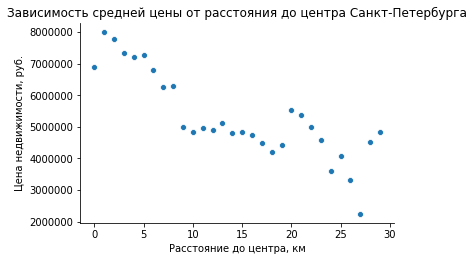

In [41]:
sns.relplot(x=spb_center_nearest.index, y='last_price', data=spb_center_nearest, height=4, aspect=1.4)
plt.title('Зависимость средней цены от расстояния до центра Санкт-Петербурга')
plt.ylabel('Цена недвижимости, руб.')
plt.xlabel('Расстояние до центра, км')
plt.show()

6 и 5 млн большая разница.Будем считать центром Санкт-Петербурга окружность радиусом 8 км.

In [42]:
spb_center = good_data[(good_data['city_center_km'] <= 8) & (good_data['town_name'] == 'Санкт-Петербург')]

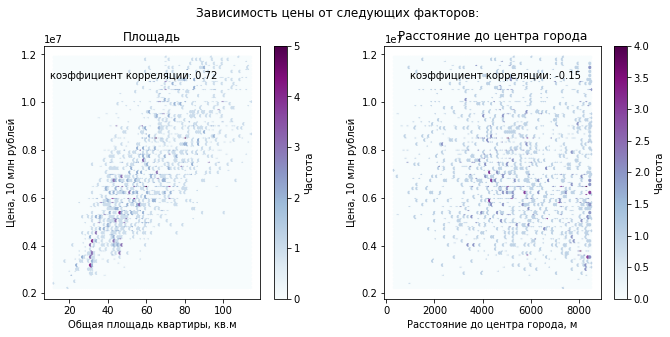

In [43]:
#Аналогично строим графики зависимости цены от площади и от расстояния до центра города
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Зависимость цены от следующих факторов:')

# Аналогично строим график зависимости цены от площади
ax1.set_title('Площадь')
ax1.set_ylabel('Цена, 10 млн рублей')
ax1.set_xlabel('Общая площадь квартиры, кв.м')
ax1.text(10, 11000000, 
         'коэффициент корреляции: ' + str(round(spb_center['last_price'].corr(spb_center['total_area']), 2)))
hb1 = ax1.hexbin(spb_center['total_area'], spb_center['last_price'], cmap='BuPu')
cb1 = fig.colorbar(hb1, ax=ax1)
cb1.set_label('Частота')

# Аналогично строим график зависимости цены от расстояния до центра города
ax2.set_title('Расстояние до центра города')
ax2.set_ylabel('Цена, 10 млн рублей')
ax2.set_xlabel('Расстояние до центра города, м')
ax2.text(1000, 11000000, 
         'коэффициент корреляции: ' + str(round(spb_center['last_price'].corr(spb_center['city_center_nearest']), 2)))
hb2 = ax2.hexbin(spb_center['city_center_nearest'], spb_center['last_price'], cmap='BuPu')
cb2 = fig.colorbar(hb2, ax=ax2)
cb2.set_label('Частота')

plt.tight_layout(pad=3)
plt.show()

Похожая ситуация, когда мы анализировали зависимости по датафрейму в целом. Прямая зависимость площади и цены и обратная зависимость расстояния и цены (правда коэффициент корреляции относительно небольшой)

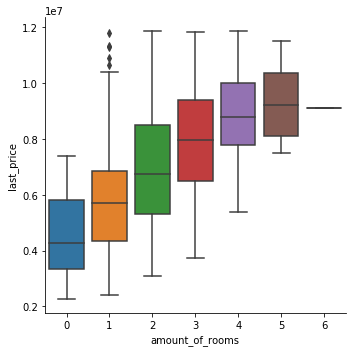

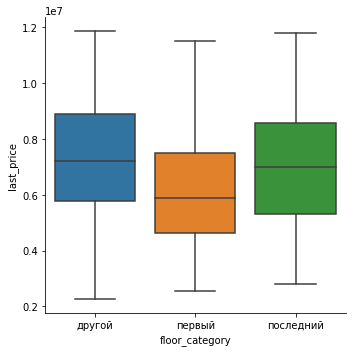

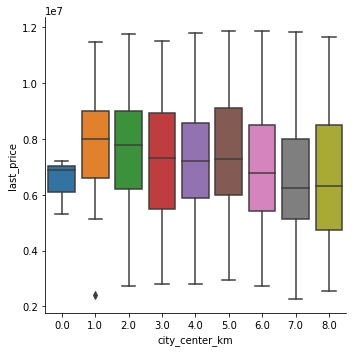

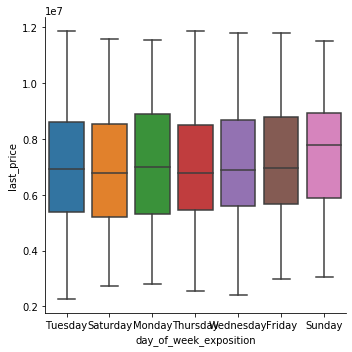

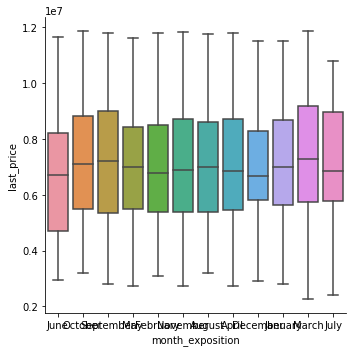

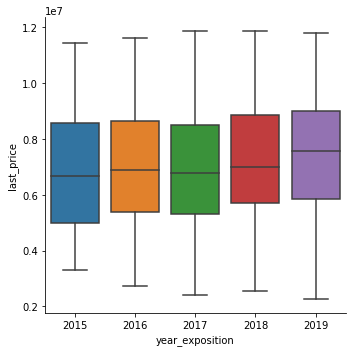

In [44]:
for column in ['amount_of_rooms', 'floor_category', 'city_center_km', 'day_of_week_exposition', 'month_exposition', 'year_exposition']:
    sns.catplot(x=column, y="last_price", kind="box", data=spb_center)

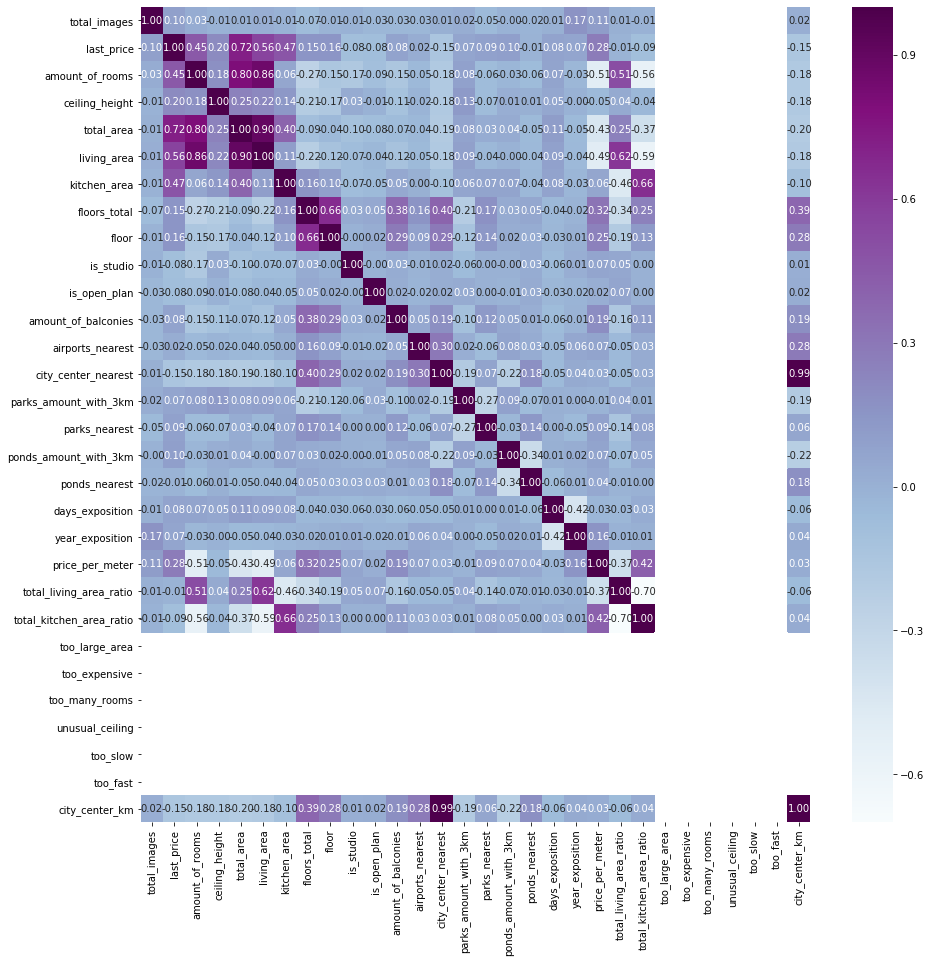

In [45]:
#Аналогично воспользуемся функцией corr() и посмотрим, как влияют определенные параметры квартиры на её финальную цену в центре Санкт=Петербурга
plt.figure(figsize=(15,15))
sns.heatmap(spb_center.corr(), annot=True, cmap="BuPu", fmt='.2f')

Зависимость стоимости квартиры от числа комнат в центре Санкт-Петербурга сильнее: здесь больше платежеспособного спроса на 5-комнатные квартиры, что приводит к прямо пропорциональной зависимости цены от числа комнат. 
Кроме того, в центре города наблюдается явно выраженная зависимость от этажа квартиры: квартира на последнем этаже в среднем будет стоить дороже, чем на первом. 
Цена квартиры от дня недели, когда опубликовали объявление о продаже также зависит. Чаще просматривали квартиры в воскресенье. То же верно и для объявлений, опубликованных в начале весны и начале осени (в марте и сентябре соответственно) в период 2015-2019 гг.: в среднем такие квартиры продавались дороже.
Чем дальше от центра города, тем в среднем квартира будет стоить дешевле.
По матрице корреляций стоимость больше всего зависит от площади и от жилой площади

### Шаг 5. Общий вывод

Сделаем выводы и на основе данных о корреляции, и на основе графиков.
Укажем факторы, которые сильнее всего влияют на конечную цену:

1. Чем больше площадь квартиры, тем выше цена	
2. Чем больше цена за квадратный метр, тем выше цена
3. Чем выше доля жилой площади/площадь кухни, тем выше цена	
4. Чем больше комнат, тем выше цена	
5. На первом этаже квартира дешевле, чем на остальных; на последнем дороже, чем на первом, но дешевле чем на остальных	
6. Чем ближе к центру, тем дороже квартира. В самом центре квартиры стоят дороже, чем на более удаленных.	
7. Квартиры, размещенные к продаже в выходные, в среднем дороже, чем размещенные в будни.	
8. Квартиры, размещенные к продаже в начале весны или осени, в среднем дороже, чем размещенные в любые другие месяца.
9. Квартиры, размещенные к продаже в 2014 году, дороже всех. Период 2015-2018 - период низких цен на квартиры. 		 

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод